In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime
import chardet

In [2]:
companies = pd.read_csv("/Users/riteshdubey/Downloads/companies.csv", encoding="ISO-8859-1")

In [3]:
rounds2 = pd.read_csv("/Users/riteshdubey/Downloads/rounds2.csv", encoding="ISO-8859-1")

In [4]:
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
rounds2["company_permalink"] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2["funding_round_permalink"] = rounds2.funding_round_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
# Finding the uniq companies in round2 and companies dataset
print(f'There are {rounds2["company_permalink"].nunique()} uniq rows in rounds dataset')
print(f'There are {companies["permalink"].nunique()} uniq rows in companies dataset')

There are 90247 uniq rows in rounds dataset
There are 66368 uniq rows in companies dataset


In [10]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [11]:
#checking the companies permalink rows which are not present in rounds2
companies.permalink = companies.permalink.str.replace(' ', '')
rounds2.company_permalink = rounds2.company_permalink.str.replace(' ', '')
company_permalink = rounds2.company_permalink.unique()
companies[companies["permalink"].apply(lambda x: x not in company_permalink)]["permalink"]

Series([], Name: permalink, dtype: object)

In [12]:
# setting primary key as index
companies.set_index('permalink', inplace=True)
rounds2.set_index('company_permalink', inplace=True)

In [13]:
#merging rounds2 and company file
master_frame = rounds2.join(companies)

In [14]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [15]:
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114949 entries, /organization/-fame to /organization/zzzzapp-com
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   funding_round_permalink  114949 non-null  object 
 1   funding_round_type       114949 non-null  object 
 2   funding_round_code       31140 non-null   object 
 3   funded_at                114949 non-null  object 
 4   raised_amount_usd        94959 non-null   float64
 5   name                     114948 non-null  object 
 6   homepage_url             108815 non-null  object 
 7   category_list            111539 non-null  object 
 8   status                   114949 non-null  object 
 9   country_code             106271 non-null  object 
 10  state_code               104003 non-null  object 
 11  region                   104782 non-null  object 
 12  city                     104785 non-null  object 
 13  founded_at               94

In [17]:
master_frame.sample(10)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
/organization/bboxx,/funding-round/ce634f148aaa09adee40e44b9c8afaba,venture,B,12-03-2015,3000000.0,BBOXX,http://www.bboxx.co.uk,Hardware + Software,operating,GBR,H9,London,London,01-01-2010
/organization/rentals-united,/funding-round/a7e2baac5172025d17d2017fa5fc48a0,seed,NaN,10-11-2014,715527.0,Rentals United,http://rentalsunited.com,B2B|Distribution|Online Rental|SaaS|Travel|Vac...,operating,SWE,26,Stockholm,Stockholm,01-05-2012
/organization/copier-how-to,/funding-round/3ca637ddf02a8105da85bb3dfd67a1a2,equity_crowdfunding,NaN,15-07-2014,2000.0,Copier How To,NaN,Manufacturing|Printing|Software,operating,CAN,BC,Vancouver,Vancouver,01-05-2014
/organization/us-drum-supply,/funding-round/820ae5854f4e24b4af78d7749fb8e45b,equity_crowdfunding,NaN,29-10-2013,NaN,US Drum Supply,http://www.usdrumsupply.com,Manufacturing,operating,USA,IA,Des Moines,Madrid,01-07-2010
/organization/techpepper,/funding-round/acd9dc447530623c251268d4ba0aadcb,seed,NaN,19-10-2013,10000.0,TechPepper,http://techpepper.org/,Social News,operating,USA,MA,Boston,Boston,05-09-2013
/organization/raffstar,/funding-round/3789defbed934486f6af30b6678ed2b2,seed,NaN,01-04-2008,NaN,Raffstar,http://www.raffstar.com,Curated Web,closed,USA,OK,Tulsa,Tulsa,01-08-2008
/organization/domo,/funding-round/86e9078798af150a4bb402c96a7babef,venture,C,05-02-2014,125000000.0,Domo,http://www.domo.com,Business Intelligence|Enterprise Software|SaaS...,operating,USA,UT,Salt Lake City,American Fork,01-10-2010
/organization/omnisoft-services,/funding-round/82103d8cbd6828367ce5d14b94f4af95,seed,NaN,01-06-2012,15000.0,Omnisoft Services,http://omnisoftservices.com/,Education|Fitness|Health Care|Medical,operating,USA,TN,Chattanooga,Chattanooga,NaN
/organization/lensar,/funding-round/a533cb458333816e0cf89306c6ef6fe6,debt_financing,NaN,19-12-2011,1425000.0,LensAR,http://www.lensar.com,Health Care,acquired,USA,FL,Orlando,Orlando,01-01-2004
/organization/fashion-project,/funding-round/15c5d40000ca7653c26e3b4aaee3d6a1,venture,NaN,28-10-2014,7200000.0,Fashion Project,http://www.fashionproject.com,Fashion|Finance,operating,USA,MA,Boston,Boston,01-01-2011


In [18]:
master_frame.groupby(by="funding_round_type").aggregate({'funding_round_type':'count'})

,funding_round_type
funding_round_type,
angel,6094
convertible_note,1817
debt_financing,6895
equity_crowdfunding,3257
grant,2200
non_equity_assistance,191
post_ipo_debt,152
post_ipo_equity,638
private_equity,2285


In [19]:
# Since we are only interested in ["venture", "seed", "angel", "private_equity"], lets drop other rows
master_frame = master_frame[master_frame.funding_round_type.isin(["venture", "seed", "angel", "private_equity"])]

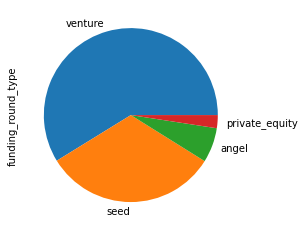

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64


In [20]:
# presenting the representative data into pie chart
representative_data = master_frame.funding_round_type.value_counts()
representative_data.plot.pie()
plt.show()
print(representative_data)

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

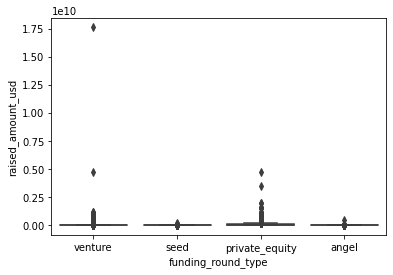

In [21]:
sns.boxplot(x="funding_round_type", y="raised_amount_usd", data=master_frame)

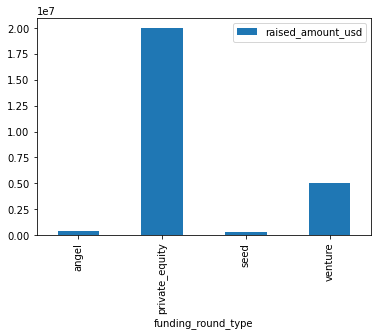

                    raised_amount_usd
funding_round_type                   
angel                        400000.0
private_equity             20000000.0
seed                         275000.0
venture                     5000000.0


In [22]:
median_value = master_frame.groupby(by="funding_round_type").aggregate({'raised_amount_usd':'median'})
median_value.plot.bar()
plt.show()
print(median_value)

In [23]:
#finding the ideal investment
median_value[median_value["raised_amount_usd"].apply(lambda x: x >= 5000000 and x <= 15000000)]

,raised_amount_usd
funding_round_type,
venture,5000000.0


In [25]:
master_frame[master_frame["funding_round_type"]=="venture"]["raised_amount_usd"].describe()

count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [26]:
# droping rows which contain NA for raised_amount_usd
master_frame["raised_amount_usd"].dropna(inplace=True)

In [28]:
# top 9 countries with highest venture typefunding
top9=master_frame[
    master_frame["funding_round_type"]=="venture"
].groupby("country_code").sum().sort_values("raised_amount_usd", ascending=False).head(9)

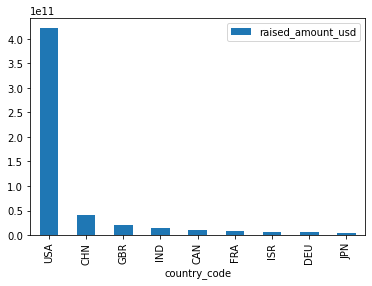

In [29]:
top9.plot.bar()
plt.show()

In [30]:
# As our invester wants to invest only in top3 english speaking so these USA, GBR, IND
print(top9)
print("As our invester wants to invest only in top3 english speaking so these USA, GBR, IND")

              raised_amount_usd
country_code                   
USA                4.225108e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09
As our invester wants to invest only in top3 english speaking so these USA, GBR, IND


In [32]:
# read mapping csv
mapping = pd.read_csv("/Users/riteshdubey/Downloads/mapping.csv")

In [33]:
mapping.sample(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
207,Distributors,0,0,0,0,0,0,0,1,0
345,Hotels,0,0,0,1,0,0,0,0,0
153,Corporate IT,0,0,0,0,0,0,0,0,1
536,Price Comparison,0,0,0,0,0,0,0,0,1
99,Charter Schools,0,0,0,0,0,0,0,0,1
55,Batteries,0,0,0,0,0,1,0,0,0
537,Printing,0,0,0,0,0,0,0,1,0
350,IaaS,0,0,0,0,0,0,0,1,0
636,Systems,0,0,0,0,0,0,0,1,0
17,Algorithms,0,0,0,0,0,0,0,1,0


In [34]:
# make primary sector column
master_frame["primary_sector"] = 0
master_frame["primary_sector"] = master_frame.category_list.str.split("|", expand=True)

In [35]:
master_frame["primary_sector"].head(10)

/organization/-fame                                    Media
/organization/-qounter                 Application Platforms
/organization/-qounter                 Application Platforms
/organization/-the-one-of-them-inc-                     Apps
/organization/0-6-com                            Curated Web
/organization/004-technologies                      Software
/organization/0ndine-biomedical-inc            Biotechnology
/organization/0ndine-biomedical-inc            Biotechnology
/organization/0xdata                               Analytics
/organization/0xdata                               Analytics
Name: primary_sector, dtype: object

In [36]:
mapping.reset_index(inplace=True)
mapping["category_list"] = mapping.category_list.str.replace('0', 'na')

In [37]:
# setting category_list as index column
mapping.set_index("category_list", inplace=True)

In [38]:
mapping.head(10)

,index,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,,
NaN,0,0,1,0,0,0,0,0,0,0
3D,1,0,0,0,0,0,1,0,0,0
3D Printing,2,0,0,0,0,0,1,0,0,0
3D Technology,3,0,0,0,0,0,1,0,0,0
Accounting,4,0,0,0,0,0,0,0,0,1
Active Lifestyle,5,0,0,0,0,1,0,0,0,0
Ad Targeting,6,0,0,0,0,0,0,0,0,1
Advanced Materials,7,0,0,0,0,0,1,0,0,0
Adventure Travel,8,1,0,0,0,0,0,0,0,0


In [39]:
mapping.drop("index", axis=1, inplace=True)

In [40]:
# generating dictionary for mapping
sector_dict = {ids: next(column for column in mapping if row[column]==1) for ids, row in mapping.iterrows()}

In [41]:
sector_dict

{nan: 'Blanks',
 '3D': 'Manufacturing',
 '3D Printing': 'Manufacturing',
 '3D Technology': 'Manufacturing',
 'Accounting': 'Social, Finance, Analytics, Advertising',
 'Active Lifestyle': 'Health',
 'Ad Targeting': 'Social, Finance, Analytics, Advertising',
 'Advanced Materials': 'Manufacturing',
 'Adventure Travel': 'Automotive & Sports',
 'Advertising': 'Social, Finance, Analytics, Advertising',
 'Advertising Exchanges': 'Social, Finance, Analytics, Advertising',
 'Advertising Networks': 'Social, Finance, Analytics, Advertising',
 'Advertising Platforms': 'Social, Finance, Analytics, Advertising',
 'Advice': 'Others',
 'Aerospace': 'Automotive & Sports',
 'Agriculture': 'Manufacturing',
 'Air Pollution Control': 'Cleantech / Semiconductors',
 'Algorithms': 'Others',
 'All Markets': 'Others',
 'All Students': 'Others',
 'Alternative Medicine': 'Health',
 'Alumni': 'Others',
 'Analytics': 'Social, Finance, Analytics, Advertising',
 'Android': 'Social, Finance, Analytics, Advertising',
 

In [42]:
# mapping with master_frame
master_frame["main_sector"] = master_frame["primary_sector"].map(sector_dict)

In [43]:
# dropping Na and rows which could not mapped
master_frame.dropna(subset=["main_sector"], inplace=True)

In [44]:
master_frame.groupby("main_sector").aggregate({'main_sector':'count'})

,main_sector
main_sector,
Automotive & Sports,1883
Blanks,2497
Cleantech / Semiconductors,12712
Entertainment,6991
Health,6487
Manufacturing,5683
"News, Search and Messaging",14156
Others,21201
"Social, Finance, Analytics, Advertising",22485


In [45]:
# deleteing blanks as there are only  8 sectors
master_frame = master_frame[master_frame["main_sector"]!="Blanks"]

In [46]:
sectors = master_frame.main_sector.value_counts()

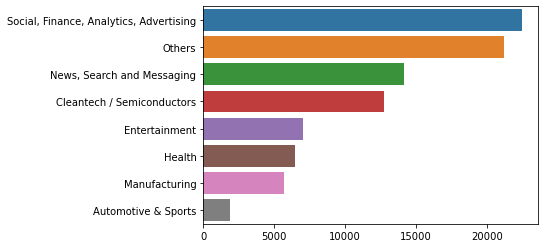

Social, Finance, Analytics, Advertising    22485
Others                                     21201
News, Search and Messaging                 14156
Cleantech / Semiconductors                 12712
Entertainment                               6991
Health                                      6487
Manufacturing                               5683
Automotive & Sports                         1883
Name: main_sector, dtype: int64


In [47]:
sns.barplot(x=sectors.values, y=sectors.index)
plt.show()
print(sectors)

In [48]:
# Now creating 3 dataframe contry wise for venture funding
cond_1 = (master_frame["funding_round_type"]=="venture")
cond_2 = (master_frame["raised_amount_usd"].isin(np.arange(5000000, 15000000+1)))
cond = (cond_1 & cond_2)
C1 = master_frame[cond & (master_frame["country_code"]=="USA")]
C2 = master_frame[cond & (master_frame["country_code"]=="GBR")]
C3 = master_frame[cond & (master_frame["country_code"]=="IND")]


    For Country: USA
        Total number of Investments (count): 12012
        Total amount of investment (USD): 107318294664.0
        Top Sector name (no. of investment-wise): Others
        Second Sector name (no. of investment-wise):Social, Finance, Analytics, Advertising
        Third Sector name (no. of investment-wise): Cleantech / Semiconductors
        Number of investments in top sector (3): 2950
        Number of investments in second sector (4): 2714
        Number of investments in third sector (5):2300
        For point 3 (top sector count-wise), which company received the highest investment?: Virtustream
        For point 4 (second best sector count-wise), which company received the highest investment?: SST Inc. (Formerly ShotSpotter)
    

    For Country: GBR
        Total number of Investments (count): 619
        Total amount of investment (USD): 5365228300.0
        Top Sector name (no. of investment-wise): Others
        Second Sector name (no. of investment-wise

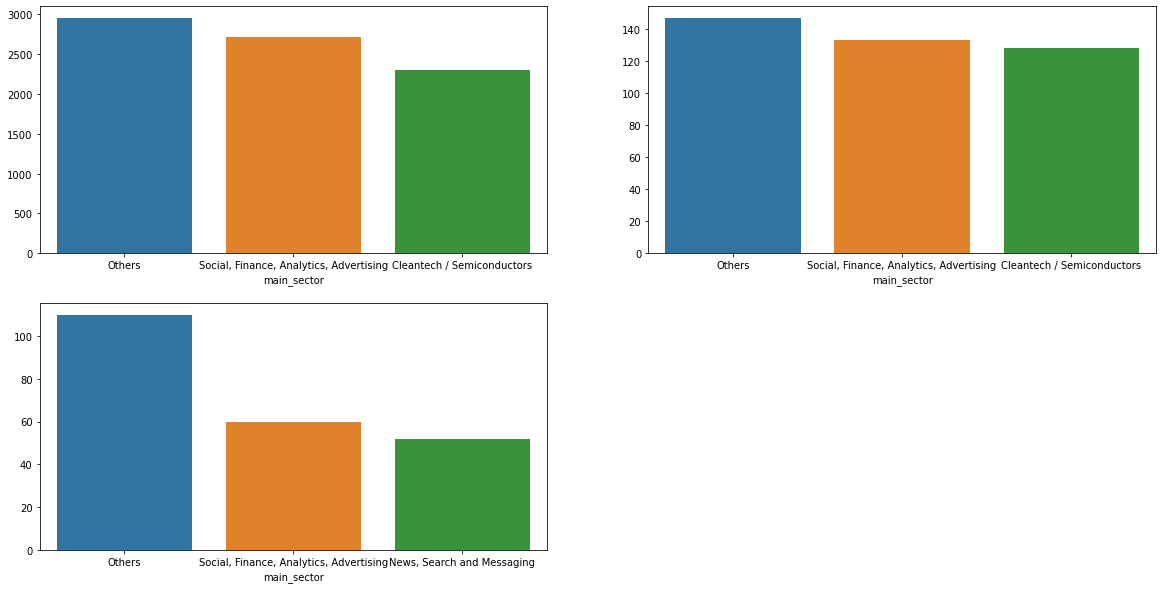

In [136]:
plt.figure(figsize=(20,10))
i = 1
for df, C in zip((C1, C2, C3),('USA', 'GBR', 'IND')):
    sector_inv = df.groupby("main_sector").aggregate({'funding_round_permalink': 'count'}).sort_values('funding_round_permalink', ascending=False)
    company_inv_top_sector = df[df["main_sector"]==sector_inv.index[0]].groupby("name").aggregate({'raised_amount_usd': 'sum'}).sort_values('raised_amount_usd', ascending=False).index[0]
    company_inv_second_sector = df[df["main_sector"]==sector_inv.index[1]].groupby("name").aggregate({'raised_amount_usd': 'sum'}).sort_values('raised_amount_usd', ascending=False).index[0]
    print(f"""
    For Country: {C}
        Total number of Investments (count): {df.funding_round_permalink.count()}
        Total amount of investment (USD): {df.raised_amount_usd.sum()}
        Top Sector name (no. of investment-wise): {sector_inv.index[0]}
        Second Sector name (no. of investment-wise):{sector_inv.index[1]}
        Third Sector name (no. of investment-wise): {sector_inv.index[2]}
        Number of investments in top sector (3): {sector_inv.values[0][0]}
        Number of investments in second sector (4): {sector_inv.values[1][0]}
        Number of investments in third sector (5):{sector_inv.values[2][0]}
        For point 3 (top sector count-wise), which company received the highest investment?: {company_inv_top_sector}
        For point 4 (second best sector count-wise), which company received the highest investment?: {company_inv_second_sector}
    """)
    plt.subplot(2,2,i)
    sns.barplot(x=sector_inv[:3]["funding_round_permalink"].index, y=sector_inv[:3]["funding_round_permalink"].values)
    i += 1
plt.show()
    

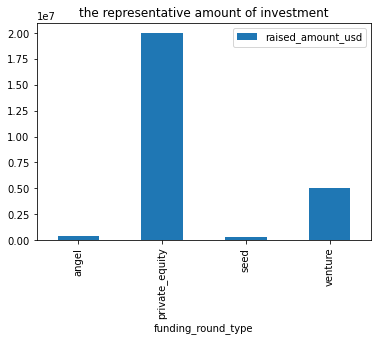

                    raised_amount_usd
funding_round_type                   
angel                        400000.0
private_equity             20000000.0
seed                         278088.0
venture                     5000000.0


In [64]:
#the representative amount of investment 
median_value = master_frame.groupby(by="funding_round_type").aggregate({'raised_amount_usd':'median'})
median_value.plot.bar(title="the representative amount of investment")
plt.show()
print(median_value)

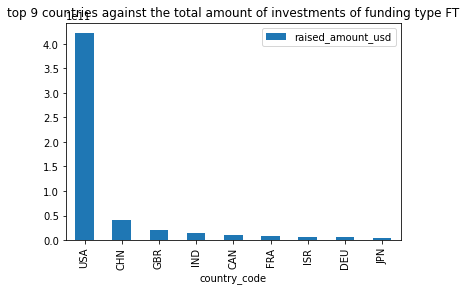

In [65]:
# top 9 countries against the total amount of investments of funding type FT.
top9.plot.bar(title="top 9 countries against the total amount of investments of funding type FT")
plt.show()

In [137]:
master_frame.to_csv("\\master_frame.csv")

In [139]:
master_d = C1[C1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [140]:
master_d=master_d.append(
    C2[C2['main_sector'].isin(
        ['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [141]:
master_d=master_d.append(
    C3[C3['main_sector'].isin(
        ['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)


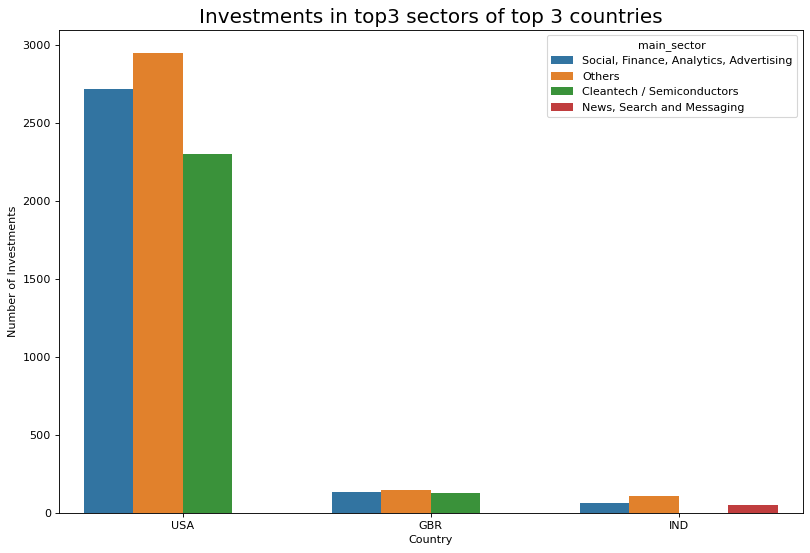

In [143]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_d,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()